# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/homeworks/

 creditcard.csv  'Task 2 NumPy.ipynb'  'Task 2 Pandas.ipynb'  'Task 4.ipynb'


In [ ]:
df = pd.read_csv('drive/MyDrive/homeworks/creditcard.csv')

In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().any().sum(axis=0)

0

Мы видим, что все признаки количественные и пропусков в данных нет

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

0.9970260764101937

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X = StandardScaler().fit_transform(X)
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy'))

0.999139768026079

In [ ]:
X = MinMaxScaler().fit_transform(X)
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy'))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.9990028329675888

После z-стандартизации не возникает варнингов и результат на кросс-валидации лучше, оставим его!

In [ ]:
X = StandardScaler().fit_transform(X)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
from collections import Counter
Counter(df['Class'])

Counter({0: 284315, 1: 492})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
y_pred_proba_knn = y_pred_proba_knn[:, 1]

In [ ]:
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_const = np.zeros(len(y_test))
y_pred_proba_const = y_pred_const

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
print('accuracy on log reg:', accuracy_score(y_test, y_pred_log_reg))
print('accuracy on knn:', accuracy_score(y_test, y_pred_knn))
print('accuracy on const:', accuracy_score(y_test, y_pred_const))

accuracy on log reg: 0.999180739006855
accuracy on knn: 0.99946497241264
accuracy on const: 0.9979936465474001


In [ ]:
print('precision on log reg:', precision_score(y_test, y_pred_log_reg))
print('precision on knn:', precision_score(y_test, y_pred_knn))
print('precision on const:', precision_score(y_test, y_pred_const))

precision on log reg: 0.9080459770114943
precision on knn: 0.9583333333333334
precision on const: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
print('recall on log reg:', recall_score(y_test, y_pred_log_reg))
print('recall on knn:', recall_score(y_test, y_pred_knn))
print('recall on const:', recall_score(y_test, y_pred_const))

recall on log reg: 0.6583333333333333
recall on knn: 0.7666666666666667
recall on const: 0.0


In [ ]:
print('f1 on log reg:', f1_score(y_test, y_pred_log_reg))
print('f1 on knn:', f1_score(y_test, y_pred_knn))
print('f1 on const:', f1_score(y_test, y_pred_const))

f1 on log reg: 0.7632850241545893
f1 on knn: 0.8518518518518519
f1 on const: 0.0


In [ ]:
print('roc auc on log reg:', roc_auc_score(y_test, y_pred_proba_log_reg))
print('roc auc on knn:', roc_auc_score(y_test, y_pred_proba_knn))
print('roc auc on const:', roc_auc_score(y_test, y_pred_proba_const))

roc auc on log reg: 0.9743744066566147
roc auc on knn: 0.9373740715921147
roc auc on const: 0.5


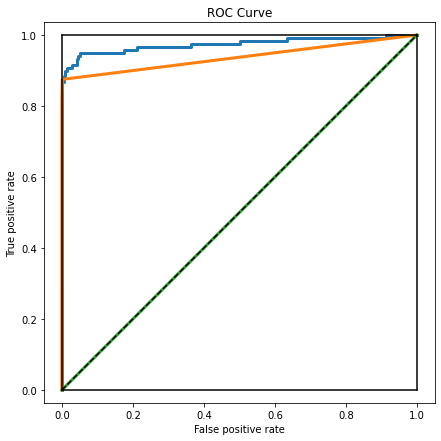

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
for y_pred_proba in (y_pred_proba_log_reg, y_pred_proba_knn, y_pred_proba_const):
    fpr, tpr, threshholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.plot([1, 1], [1, 0], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.show()


Мы видим довольно высокий accuracy на константе, что говорит нам о несбалансированности классов. На тестовой выборке accuracy получился выше у KNN, хотя разница не большая. Precision, recall, f1 тоже лучше у KNN. Однако вероятности с точки зрения порядка лучше предсказала логистическая регрессия, roc auc score у нее немного выше. Для модели, которая предсказывает константы,на этих метриках (кроме accuracy) все печально. 

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Я считаю, что нужно выбрать метрику f1 score. Потому что, когда f1 score будет максимальным, и precision и recall будут на достойном уровне. Это будет говорить, что наша модель довольно точно и полно определяет мошеннические транзакции. Это важно, потому что недостаточно чего-то одного из них: если модель будет точно определять фроды, но при этом не находить многие из них - это плохо (много клиентов станет жертвами мошенничества, рискуем потерять клиентов), если модель будет полно определять фроды, но при этом много ошибаться - это тоже плохо (робот забанит много обычных клиентов, после этого мы тоже рискуем их потерять)

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

In [ ]:
weight = y.shape[0] / y[y == 1].shape[0]
recalls = []
precisions = []
f1s = []
weights_of_one = range(1, 25)
for w in weights_of_one:
    log_reg = LogisticRegression(class_weight={0:1, 1:w})
    f1 = np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1'))
    precision = np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='precision'))
    recall = np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='recall'))
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

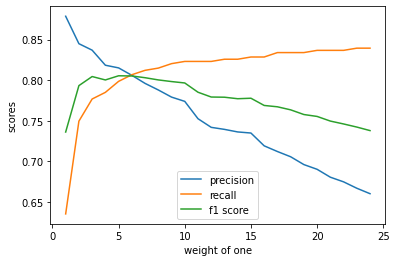

In [ ]:
plt.plot(weights_of_one, precisions)
plt.plot(weights_of_one, recalls)
plt.plot(weights_of_one, f1s)
plt.xlabel('weight of one')
plt.ylabel('scores')
plt.legend(['precision', 'recall', 'f1 score'])
plt.show()

In [ ]:
f1s = np.array(f1s)
weights_of_one[f1s.argmax()]

5

In [ ]:
precisions[4], recalls[4], f1s[4]

(0.8150984979927877, 0.7985190670122176, 0.805391963213139)

Мы видим, что при весе класса 0 - 1, класса 1 - 5 получается наибольший f1 score. И при таком распорядке и precision, и recall имеют неплохие значения

In [ ]:
reg_coefs = np.arange(0.1, 3, 0.1)
f1s = []
for coef in reg_coefs:
    log_reg = LogisticRegression(C=coef, class_weight={0:1, 1:5})
    f1s.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1')))

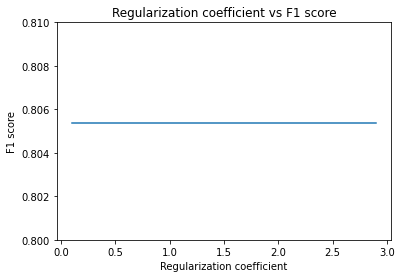

In [ ]:
plt.plot(reg_coefs, f1s)
plt.xlabel('Regularization coefficient')
plt.ylabel('F1 score')
plt.title('Regularization coefficient vs F1 score')
plt.ylim((0.8, 0.81))
plt.show()

Мы видим, что перебор коэффициента регуляризации не помогает улучшить результат

In [ ]:
f1s

[0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139]

Попробуем перебрать алгоритмы:

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
f1s = []
for solver in solvers:
    log_reg = LogisticRegression(solver=solver, class_weight={0:1, 1:5})
    f1s.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1')))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn

Мы получили варнинги, что max_iter был достигнут, попробуем сделать его больше:

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
f1s = []
for solver in solvers:
    log_reg = LogisticRegression(solver=solver, class_weight={0:1, 1:5}, max_iter=500)
    f1s.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1')))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
f1s = []
for solver in solvers:
    log_reg = LogisticRegression(solver=solver, class_weight={0:1, 1:5}, max_iter=1000)
    f1s.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1')))

In [ ]:
f1s

[0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139,
 0.805391963213139]

Как видим f1 score на кросс-валидации при всех алгоритмах одинаковый 

Алгоритм лог регрессии solver='lbfgs' поддерживает только l2 и none штрафы, проверим будет ли разница:

In [ ]:
penalties = ['l2', 'none']
f1s = []
for penalty in penalties:
    log_reg = LogisticRegression(penalty=penalty, class_weight={0:1, 1:5})
    f1 = np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='f1'))
    print('for {} f1 score is {}'.format(penalty, f1))

for l2 f1 score is 0.805391963213139
for none f1 score is 0.805391963213139


Разницы в штрафах нет

Окей, кажется мы нашли оптимальный набор гиперпараметров для логрега, это "class_weight={0:1, 1:5}"

Проведем отбор признаков:

In [ ]:
from sklearn.feature_selection import f_classif, VarianceThreshold, SelectKBest 

In [ ]:
log_reg = LogisticRegression(class_weight={0:1, 1:5})

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
X_kbest = SelectKBest(f_classif, k=5).fit_transform(X, y)
X_varth = VarianceThreshold(.9).fit_transform(X)

In [ ]:
np.mean(cross_val_score(log_reg, X_kbest, y, cv=5, scoring='f1'))

0.8115939131291243

In [ ]:
np.mean(cross_val_score(log_reg, X_varth, y, cv=5, scoring='f1'))

0.805391963213139

In [ ]:
np.mean(cross_val_score(KNeighborsClassifier(), X_kbest, y, cv=5, scoring='f1'))

0.8488502873755627

In [ ]:
np.mean(cross_val_score(KNeighborsClassifier(), X_varth, y, cv=5, scoring='f1'))

0.8390120228106499

Видно, какой замечательный результат дает отбор с помощью SelectKBest! Также мы видим, что модель KNN дает лучше результат на кросс-валидации чем модель лог регрессии. Оставим ее

Продолжим перебор:

In [ ]:
f1s = []
for i in range(1, 10):
    for n in range(1, 15):
        X_kbest = SelectKBest(f_classif, k=i).fit_transform(X, y)
        f1s.append((i, n, np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=n), X_kbest, y, cv=5, scoring='f1'))))

In [ ]:
best_result = max(f1s, key=lambda x: x[2])
best_number_of_features, best_number_of_neighbors, best_f1 = best_result
best_number_of_features, best_number_of_neighbors, best_f1

(7, 3, 0.8708735909822867)

Отлично! На основе перебора можем сказать, что лучшая модель - KNN, лучшее число признаков - 7, лучшее число соседей 3, а f1 score на кросс-валидации = 0.87

In [ ]:
best_model = KNeighborsClassifier(n_neighbors=3)
X_kbest = SelectKBest(f_classif, k=7).fit_transform(X, y)
print('precision on cross val = ', np.mean(cross_val_score(best_model, X_kbest, y, scoring='precision')))
print('recall on cross val = ', np.mean(cross_val_score(best_model, X_kbest, y, scoring='recall')))
print('f1 on cross val = ', np.mean(cross_val_score(best_model, X_kbest, y, scoring='f1')))
print('roc auc on cross val = ', np.mean(cross_val_score(best_model, X_kbest, y, scoring='roc_auc')))

precision on cross val =  0.9487087757789068
recall on cross val =  0.8065531284709365
f1 on cross val =  0.8708735909822867
roc auc on cross val =  0.9168366570482075


# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Я выбрал задачу классификации музыкального жанра: https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification

In [ ]:
data = pd.read_csv('drive/MyDrive/homeworks/features_3_sec.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
data.isna().any().sum(axis=0)

0

Пропусков в данных нет

In [ ]:
data.drop(['filename', 'length'], axis=1, inplace=True)

In [ ]:
data.label.value_counts()

reggae       1000
blues        1000
metal        1000
pop          1000
jazz         1000
disco         999
hiphop        998
classical     998
rock          998
country       997
Name: label, dtype: int64

Прекрасно, у нас 10 сбалансированных классов!

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
X = StandardScaler().fit_transform(data.drop('label', axis=1))
y = data.label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_proba_log_reg = log_reg.predict_proba(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

In [ ]:
y_pred_const = np.array(['reggae'] * y_test.shape[0])

In [ ]:
print(accuracy_score(y_test, y_pred_log_reg))

0.7362362362362362


In [ ]:
print(accuracy_score(y_test, y_pred_knn))

0.9024024024024024


In [ ]:
print(accuracy_score(y_test, y_pred_const))

0.10560560560560561


In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_log_reg, average='macro'))

0.7317296605806933
0.737082782464558
0.7329753678895695


In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_log_reg, average='micro'))

0.7362362362362362
0.7362362362362362
0.7362362362362362


In [ ]:
print(precision_score(y_test, y_pred_knn, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.9028564231707508
0.9014989626464469
0.9014914416601117


In [ ]:
print(precision_score(y_test, y_pred_knn, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))

0.9024024024024024
0.9024024024024024
0.9024024024024024


In [ ]:
print(precision_score(y_test, y_pred_const, average='macro'))
print(recall_score(y_test, y_pred_const, average='macro'))
print(f1_score(y_test, y_pred_const, average='macro'))

0.010560560560560562
0.1
0.01910366681756451


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import make_scorer
prec = make_scorer(precision_score, average='macro')
rec = make_scorer(recall_score, average='macro')

In [ ]:
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy'))

0.5605605605605606

In [ ]:
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring=prec))

0.5593533599332919

In [ ]:
np.mean(cross_val_score(log_reg, X, y, cv=5, scoring=rec))

0.560535175879397

In [ ]:
np.mean(cross_val_score(knn, X, y, cv=5, scoring='accuracy'))

0.513113113113113

In [ ]:
np.mean(cross_val_score(knn, X, y, cv=5, scoring=prec))

0.519977885512639

In [ ]:
np.mean(cross_val_score(knn, X, y, cv=5, scoring=rec))

0.5131653266331658

Константное предсказание имеет очень плохие результаты, как и ожидалось. А остальные модели хоть и на тестовой выборке и показывают неплохой результат, на кросс-валидации же все куда хуже.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Я хочу предсказать правильно жанр как можно у больших песен! Считаю, что для этой цели идеально подходит метрика accuracy

In [ ]:
reg_coefs = np.arange(0.1, 3, 0.1)
accuracies = []
for coef in reg_coefs:
    log_reg = LogisticRegression(C=coef, max_iter=1000)
    accuracies.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')))

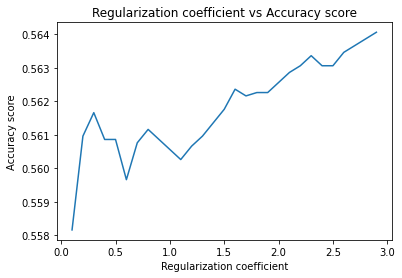

In [ ]:
plt.plot(reg_coefs, accuracies)
plt.xlabel('Regularization coefficient')
plt.ylabel('Accuracy score')
plt.title('Regularization coefficient vs Accuracy score')
plt.show()

In [ ]:
np.mean(cross_val_score(LogisticRegression(C=50, max_iter=2000), X, y, cv=5, scoring='accuracy'))

0.5645645645645645

In [ ]:
reg_coefs = np.arange(3, 150, 5)
accuracies = []
for coef in reg_coefs:
    log_reg = LogisticRegression(C=coef, max_iter=3000)
    accuracies.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')))

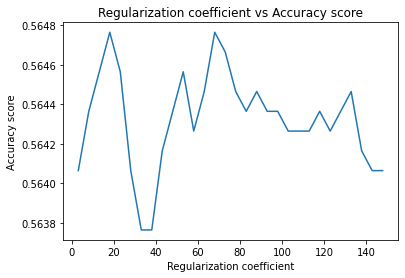

In [ ]:
plt.plot(reg_coefs, accuracies)
plt.xlabel('Regularization coefficient')
plt.ylabel('Accuracy score')
plt.title('Regularization coefficient vs Accuracy score')
plt.show()

In [ ]:
reg_coefs[np.array(accuracies).argmax()], np.array(accuracies).max()

(68, 0.5647647647647649)

Коэффициент регуляризации улучшил результат на кросс-валидации на 3 сотые, то есть почти не улучшил. Попробуем еще что-нибудь

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
accuracies = []
for solver in solvers:
    log_reg = LogisticRegression(solver=solver, max_iter=3000)
    accuracies.append(np.mean(cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')))

In [ ]:
accuracies

[0.5606606606606606,
 0.5605605605605606,
 0.5475475475475475,
 0.5609609609609609,
 0.5609609609609609]

Ощутимого результата нет

Попробуем воспользоваться SelectKBest и посчитать скор на кросс-валидации:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         9990 non-null   float64
 1   chroma_stft_var          9990 non-null   float64
 2   rms_mean                 9990 non-null   float64
 3   rms_var                  9990 non-null   float64
 4   spectral_centroid_mean   9990 non-null   float64
 5   spectral_centroid_var    9990 non-null   float64
 6   spectral_bandwidth_mean  9990 non-null   float64
 7   spectral_bandwidth_var   9990 non-null   float64
 8   rolloff_mean             9990 non-null   float64
 9   rolloff_var              9990 non-null   float64
 10  zero_crossing_rate_mean  9990 non-null   float64
 11  zero_crossing_rate_var   9990 non-null   float64
 12  harmony_mean             9990 non-null   float64
 13  harmony_var              9990 non-null   float64
 14  perceptr_mean           

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
X_kbest = SelectKBest(f_classif, k=20).fit_transform(X, y)

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
accuracies = []
for i in range(10, 40):
    for n in range(1, 30):
        X_kbest = SelectKBest(f_classif, k=i).fit_transform(X, y)
        accuracies.append((i, n, np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=n), X_kbest, y, cv=5, scoring='accuracy'))))

In [ ]:
best_result = max(accuracies, key=lambda x: x[2])
best_number_of_features, best_number_of_neighbors, best_accuracy = best_result
best_number_of_features, best_number_of_neighbors, best_accuracy

(39, 17, 0.5146146146146147)

In [ ]:
accuracies

[(10, 1, 0.40760760760760767),
 (10, 2, 0.4085085085085085),
 (10, 3, 0.41821821821821825),
 (10, 4, 0.4185185185185185),
 (10, 5, 0.4227227227227227),
 (10, 6, 0.4255255255255255),
 (10, 7, 0.42372372372372374),
 (10, 8, 0.4255255255255255),
 (10, 9, 0.42592592592592593),
 (10, 10, 0.42592592592592593),
 (10, 11, 0.427027027027027),
 (10, 12, 0.4268268268268268),
 (10, 13, 0.42842842842842843),
 (10, 14, 0.4291291291291291),
 (10, 15, 0.4286286286286286),
 (10, 16, 0.4288288288288288),
 (10, 17, 0.42892892892892887),
 (10, 18, 0.4283283283283283),
 (10, 19, 0.4295295295295295),
 (10, 20, 0.42892892892892887),
 (10, 21, 0.43193193193193197),
 (10, 22, 0.43073073073073076),
 (10, 23, 0.43253253253253254),
 (10, 24, 0.4296296296296297),
 (10, 25, 0.4291291291291291),
 (10, 26, 0.428928928928929),
 (10, 27, 0.4283283283283283),
 (10, 28, 0.4303303303303303),
 (10, 29, 0.429029029029029),
 (11, 1, 0.41821821821821825),
 (11, 2, 0.416016016016016),
 (11, 3, 0.4272272272272272),
 (11, 4, 0.4

Результат стал лучше всего на 2 сотые, попробуем еще раз поперебирать, только немного сдвинем границы:

In [ ]:
accuracies = []
for i in range(40, 56):
    for n in range(1, 56):
        X_kbest = SelectKBest(f_classif, k=i).fit_transform(X, y)
        accuracies.append((i, n, np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=n), X_kbest, y, cv=5, scoring='accuracy'))))

In [ ]:
best_result = max(accuracies, key=lambda x: x[2])
best_number_of_features, best_number_of_neighbors, best_accuracy = best_result
best_number_of_features, best_number_of_neighbors, best_accuracy

(49, 8, 0.5224224224224224)

Лучший результат на knn на кросс-валидации accuracy = 0.522
Проделаем аналогичное с логистической регрессией, постараемся добиться лучшего результата:

In [ ]:
accuracies = []
log_reg = LogisticRegression(max_iter=1000)
for i in range(10, 56):
    X_kbest = SelectKBest(f_classif, k=i).fit_transform(X, y)
    accuracies.append((i, np.mean(cross_val_score(log_reg, X_kbest, y, cv=5, scoring='accuracy'))))

In [ ]:
best_result = max(accuracies, key=lambda x: x[1])
best_number_of_features, best_accuracy = best_result
best_number_of_features, best_accuracy

(54, 0.561961961961962)

In [ ]:
accuracies

[(10, 0.433933933933934),
 (11, 0.4528528528528528),
 (12, 0.4556556556556557),
 (13, 0.4570570570570571),
 (14, 0.47837837837837843),
 (15, 0.48718718718718723),
 (16, 0.4894894894894895),
 (17, 0.5006006006006006),
 (18, 0.5073073073073073),
 (19, 0.512912912912913),
 (20, 0.5197197197197198),
 (21, 0.5221221221221222),
 (22, 0.5230230230230231),
 (23, 0.5307307307307307),
 (24, 0.535035035035035),
 (25, 0.5357357357357357),
 (26, 0.5377377377377377),
 (27, 0.5414414414414415),
 (28, 0.5377377377377377),
 (29, 0.5353353353353354),
 (30, 0.5335335335335335),
 (31, 0.5404404404404405),
 (32, 0.5418418418418419),
 (33, 0.5424424424424424),
 (34, 0.5434434434434434),
 (35, 0.5495495495495495),
 (36, 0.5504504504504505),
 (37, 0.5515515515515516),
 (38, 0.552952952952953),
 (39, 0.5553553553553554),
 (40, 0.5565565565565567),
 (41, 0.5535535535535534),
 (42, 0.5576576576576577),
 (43, 0.5567567567567567),
 (44, 0.556056056056056),
 (45, 0.5595595595595595),
 (46, 0.557957957957958),
 (47,

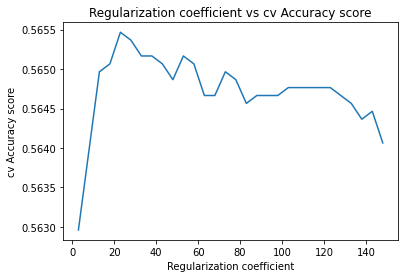

In [ ]:
plt.plot(reg_coefs, accuracies)
plt.xlabel('Regularization coefficient')
plt.ylabel('cv Accuracy score')
plt.title('Regularization coefficient vs cv Accuracy score')
plt.show()

In [ ]:
reg_coefs = np.arange(3, 150, 5)
X_kbest = SelectKBest(f_classif, k=54).fit_transform(X, y)
accuracies = []
for coef in reg_coefs:
    log_reg = LogisticRegression(C=coef, max_iter=3000)
    accuracies.append(np.mean(cross_val_score(log_reg, X_kbest, y, cv=5, scoring='accuracy')))

In [ ]:
reg_coefs[np.array(accuracies).argmax()]

23

In [ ]:
X_kbest = SelectKBest(f_classif, k=54).fit_transform(X, y)
log_reg = LogisticRegression(C=23, max_iter=2000)
np.mean(cross_val_score(log_reg, X_kbest, y, cv=5, scoring='accuracy'))

0.5654654654654655

Мой лучший скор accuracy на кросс-валидации равен 0.565 при отборе признаков с помощью SelectKBest(f_classif, k=54) и гиперпараметрах лог регрессии C=23, max_iter=2000. max_iter=2000 поставил, чтобы не возникали варнинги. Модель лог регрессии дала лучше результат (0.565), чем knn (0.522). На самом деле мне не удалось добиться результата, которого бы мне хотелось для этого датасета, скор получился невысоким